# **Einführung in Prophet**

Prophet ist ein Verfahren zur Vorhersage von Zeitreihendaten auf der Grundlage eines additiven Modells, bei dem nichtlineare Trends mit jährlicher, wöchentlicher und täglicher Saisonalität sowie Ferieneffekten angepasst werden. Es funktioniert am besten mit Zeitreihen, die starke saisonale Effekte und mehrere Saisons historischer Daten aufweisen. Prophet ist robust gegenüber fehlenden Daten und Trendverschiebungen und kommt in der Regel gut mit Ausreißern zurecht.

Prophet ist eine Open-Source-Software, die vom Core Data Science-Team von Facebook veröffentlicht wurde. Sie steht auf CRAN und PyPI zum Download bereit.

    Prophet ist also das Open-Source-Tool von Facebook zur Erstellung von Zeitreihenvorhersagen.

    Prophet zerlegt Zeitreihendaten in Trend, Saisonalität und Ferieneffekt.

    Der Trend modelliert nicht-periodische Veränderungen in den Zeitreihendaten.

    Die Saisonalität wird durch die periodischen Veränderungen wie die tägliche, wöchentliche oder jährliche Saisonalität verursacht.

    Ferieneffekt, der in unregelmäßigen Abständen über einen Tag oder einen Zeitraum von Tagen auftritt.

    Fehlerterme sind das, was nicht durch das Modell erklärt wird



# **Vorteile von Prophet**

Zum Inhaltsverzeichnis

Mit Prophet sind mehrere Vorteile verbunden. Diese sind im Folgenden aufgeführt:-

    1. Präzise und schnell - Prophet ist präzise und schnell. Es wird in vielen Anwendungen auf Facebook verwendet, um zuverlässige Prognosen für die Planung und Zielsetzung zu erstellen.

    2. Vollautomatisch - Prophet ist vollautomatisch. Wir erhalten eine vernünftige Vorhersage für unübersichtliche Daten ohne manuellen Aufwand.

    3. Einstellbare Prognosen - Prophet erstellt einstellbare Prognosen. Es bietet viele Möglichkeiten für den Benutzer, die Prognosen zu optimieren und anzupassen. Wir können vom Menschen interpretierbare Parameter verwenden, um die Vorhersage zu verbessern, indem wir unser Fachwissen hinzufügen.

    4. Verfügbar in R oder Python - Wir können das Prophet-Verfahren in R oder Python implementieren.

    5. Guter Umgang mit saisonalen Schwankungen - Prophet kann saisonale Schwankungen mit mehreren Perioden berücksichtigen.

    6. Robust gegenüber Ausreißern - Es ist robust gegenüber Ausreißern. Es behandelt Ausreißer, indem es sie entfernt.

    7. Robust gegenüber fehlenden Daten - Prophet ist widerstandsfähig gegenüber fehlenden Daten



### **Import libraries**

In [1]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

ModuleNotFoundError: No module named 'fbprophet'

In [3]:
!conda install fbprophet


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - fbprophet

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

### **Import data**

In [3]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,Passengers
0,2009-01,112
1,2009-02,118
2,2009-03,132
3,2009-04,129
4,2009-05,121


### **Preview dataset**

In [4]:
df.head()

,Month,Passengers
0,2009-01,112
1,2009-02,118
2,2009-03,132
3,2009-04,129
4,2009-05,121


We should rename the column name `#Passenegrs` as `AirPassengers`

In [5]:
df.rename(columns = {'Passengers':'AirPassengers'}, inplace = True)

### **Zusammenfassung des Datensatzes**



Nun werden wir die Informationen über den Datensatz ausgeben, die uns über die Spalten, den Datentyp der Spalten und darüber informieren, ob die Spalte null oder nicht null ist.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          144 non-null    object
 1   AirPassengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


- Wir sehen, dass der Datensatz eine Spalte `Month` und eine Spalte `AirPassengers` enthält. 

- Ihre Datentypen sind "object" bzw. "int64".

- Die [Prophet](https://facebook.github.io/prophet/)-Bibliothek erwartet als Eingabe einen Datenrahmen mit einer Spalte, die die Zeitinformationen enthält, und einer weiteren Spalte, die die Metrik enthält, die wir vorhersagen wollen. 

- Wichtig ist, dass die Spalte `Month` vom Typ datetime sein muss. Wir sehen aber, dass sie vom Datentyp "Objekt" ist. Da die Spalte  `Month`  nicht vom Datentyp "datetime" ist. Wir müssen sie also in den Datentyp datetime konvertieren

In [7]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

Wir können nun sehen, dass unsere Spalte "Monat" den richtigen Datentyp hat.

- [Prophet](https://facebook.github.io/prophet/) stellt außerdem die strenge Bedingung, dass die Eingabespalten als **ds (die Zeitspalte)** und **y (die metrische Spalte)** benannt sein müssen. 

- Wir müssen also die Spalten in unserem Daten umbenennen.

In [8]:
df = df.rename(columns={'Month': 'ds',
                        'AirPassengers': 'y'})

df.head()

,ds,y
0,2009-01-01,112
1,2009-02-01,118
2,2009-03-01,132
3,2009-04-01,129
4,2009-05-01,121


### **Visualisierung der Daten**


Es gilt als gute Praxis, die vorliegenden Daten zu visualisieren. Lassen Sie uns also unsere Zeitreihendaten darstellen:

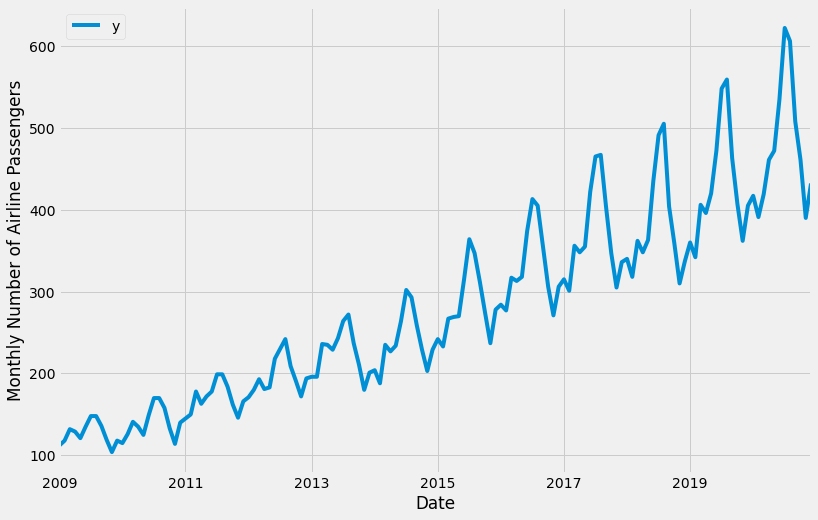

In [9]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

# **Zeitreihenprognose mit Prophet** 


Zu Beginn müssen wir ein neues Prophet-Objekt instanziieren. Prophet ermöglicht es uns, eine Reihe von Argumenten anzugeben. So können wir zum Beispiel den gewünschten Bereich unseres Unsicherheitsintervalls angeben, indem wir den Parameter  `interval_width parameter` setzen.


In [10]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [11]:
my_model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


- Um Vorhersagen für unsere Zeitreihen zu erhalten, müssen wir Prophet einen neuen DataFrame zur Verfügung stellen, der eine Spalte "ds" mit den Daten enthält, für die wir Vorhersagen wünschen. 

- Praktischerweise müssen wir uns nicht um die manuelle Erstellung dieses DataFrame kümmern, da Prophet die Hilfsfunktion `make_future_dataframe` bereitstellt.

In [12]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

,ds
0,2009-01-01
1,2009-02-01
2,2009-03-01
3,2009-04-01
4,2009-05-01


- In dem obigen Codeschnipsel haben wir Prophet angewiesen, 36 Datumsstempel in der Zukunft zu erzeugen.

- Bei der Arbeit mit Prophet ist es wichtig, die Häufigkeit unserer Zeitreihen zu berücksichtigen. 

- Da wir mit monatlichen Daten arbeiten, haben wir die gewünschte Häufigkeit der Zeitstempel klar angegeben (in diesem Fall ist `MS` der Monatsanfang). 

- Daher erzeugt `make_future_dataframe` 36 monatliche Zeitstempel für uns. 

- Mit anderen Worten, wir wollen die zukünftigen Werte unserer Zeitreihe 3 Jahre in die Zukunft vorhersagen.

In [13]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2009-01-01,85.875644,41.757061,130.980312
1,2009-02-01,79.346357,35.745463,120.415562
2,2009-03-01,110.941495,69.386999,155.659424
3,2009-04-01,108.624461,64.617030,151.875620
4,2009-05-01,112.015338,65.590625,157.697177


Prophet liefert einen großen DataFrame mit vielen interessanten Spalten, aber wir beschränken unsere Ausgabe auf die Spalten, die für die Vorhersage am wichtigsten sind. Diese sind:

  - **ds**: der Datumsstempel des prognostizierten Wertes
  - **yhat**: der prognostizierte Wert unserer Metrik (in der Statistik ist yhat eine Notation, die traditionell zur Darstellung der prognostizierten Werte eines Werts y verwendet wird)
  - **yhat_lower**: die untere Grenze der Vorhersage
  - **yhat_ober**: die obere Grenze unserer Vorhersagen

- Prophet bietet auch eine praktische Funktion, um die Ergebnisse unserer Vorhersagen wie folgt darzustellen:

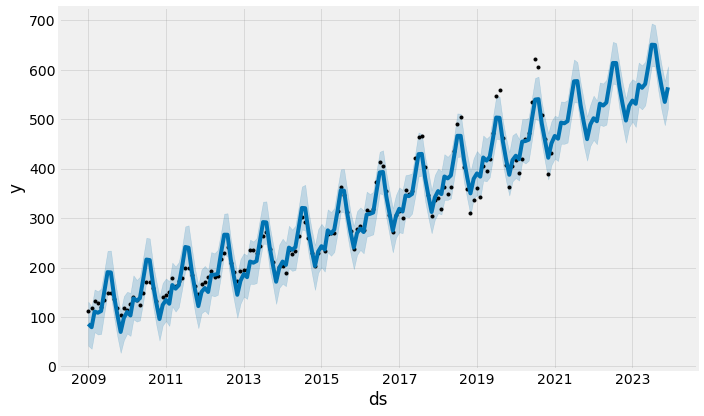

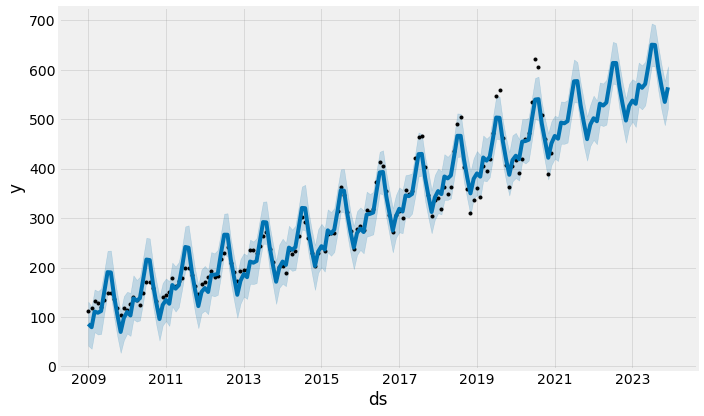

In [14]:
my_model.plot(forecast, uncertainty=True)

- Ein weiteres besonders starkes Merkmal von Prophet ist seine Fähigkeit, die Komponenten unserer Prognosen zu ermitteln. 

- Dies kann dabei helfen zu erkennen, wie die täglichen, wöchentlichen und jährlichen Muster der Zeitreihen zu den prognostizierten Gesamtwerten beitragen.

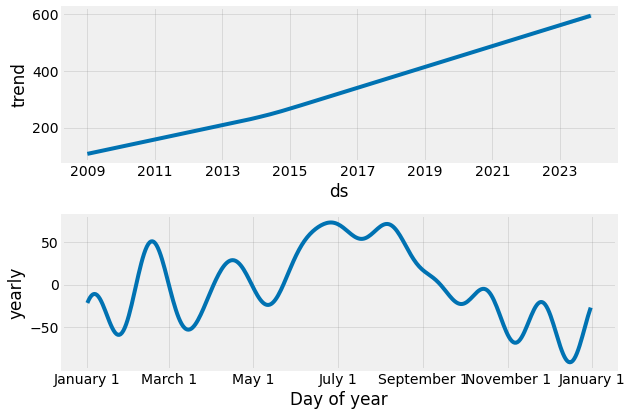

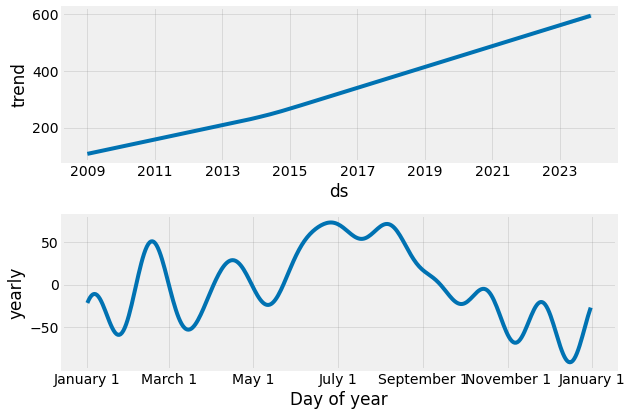

In [15]:
my_model.plot_components(forecast)

# **Aufzeichnung der prognostizierten Komponenten** 

- Die Komponenten Trend und Saisonalität der Prognose können wie folgt dargestellt werden:

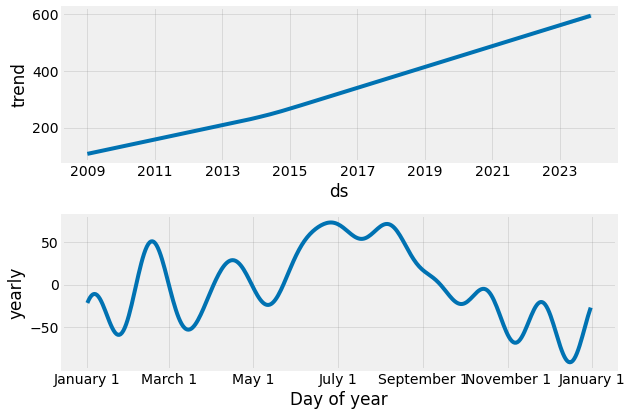

In [16]:
fig1 = my_model.plot_components(forecast)

[Go to Top](#0)